In [1]:
import numpy as np
import scipy.spatial as sp
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [8]:
def toruscoord(x: np.array, R: float = 1, r: float =0.5) -> np.array:
    #outer radius R = 1
    #inner radius r = 0.5
    xmin = np.min(x[:,0])
    xmax = np.max(x[:,0]) 
    ymin = np.min(x[:,1])
    ymax = np.max(x[:,1])
    y = []

    for i,j in x:
        phi = 2*math.pi*(i-xmin)/(xmax-xmin)
        theta = 2*math.pi*(j-ymin)/(ymax-ymin)
        a = (R + r*math.cos(theta))*math.cos(phi)
        b = (R + r*math.cos(theta))*math.sin(phi)
        c = r*math.sin(theta)
        y.append((a,b,c))

    return np.array(y)

def cilcoord(x: np.array, r:float = 1, scale: float = 0.5) -> np.array:
    #radius r = 1
    ymin = np.min(x[:,1])
    ymax = np.max(x[:,1])
    y = []

    for i,j in x:
        phi = 2*math.pi*(j-ymin)/(ymax-ymin)
        a = r*math.cos(phi)
        b = r*math.sin(phi)
        c = i*scale
        y.append((a,b,c))
    return np.array(y)

In [3]:
X = pd.read_csv(r'test_data.csv')
X = np.array(X['timestamp'])

week = []
time = []
for i in X:
    week += [int(dt.date(int(i[:4]),int(i[5:7]),int(i[8:10])).strftime("%U"))]
    t = int(dt.date(int(i[:4]),int(i[5:7]),int(i[8:10])).strftime("%w"))
    time += [int(i[11:13])*60*60 + int(i[14:16])*60 + int(i[17:19]) + 86400*t]

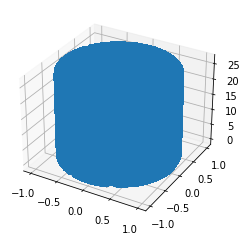

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
x,y,z = cilcoord(np.vstack((week,time)).T).T
ax.scatter(x,y,z)
plt.show()

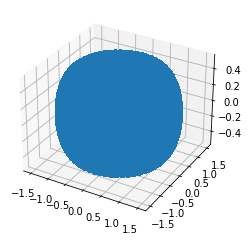

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
x,y,z = toruscoord(np.vstack((week,time)).T).T
ax.scatter(x,y,z)
plt.show()